In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score



In [2]:
!pip install xlrd
! pip install pandas openpyxl


In [3]:
# Load the dataset (example: dataset.csv)
df = pd.read_excel("/content/train.xlsx")

# Preview the dataset
print(df.head())


   T1  T2  T3  T4  T5  T6  T7  T8  T9  T10  T11  T12  T13  T14  T15  T16  T17  \
0 -70 -61 -66 -53 -51 -63 -82 -57 -76  -78  -66  -66  -61  -59  -73  -75  -63   
1 -77 -74 -71 -76 -65 -63 -66 -52 -55  -75  -72  -75  -74  -61  -64  -63  -53   
2 -53 -38 -55 -66 -62 -62 -65 -70 -62  -52  -56  -53  -66  -68  -72  -60  -68   
3 -72 -62 -59 -65 -65 -65 -78 -82 -83  -59  -84  -60  -64  -83  -69  -72  -95   
4 -67 -69 -65 -63 -59 -53 -70 -72 -71  -60  -61  -57  -54  -76  -61  -66  -71   

   T18 target  
0  -77    B37  
1  -63    B61  
2  -77    A19  
3  -73    A22  
4  -80    A33  


In [4]:
# Extract features (excluding the target column if necessary)
features = df.drop(columns=['target'])

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

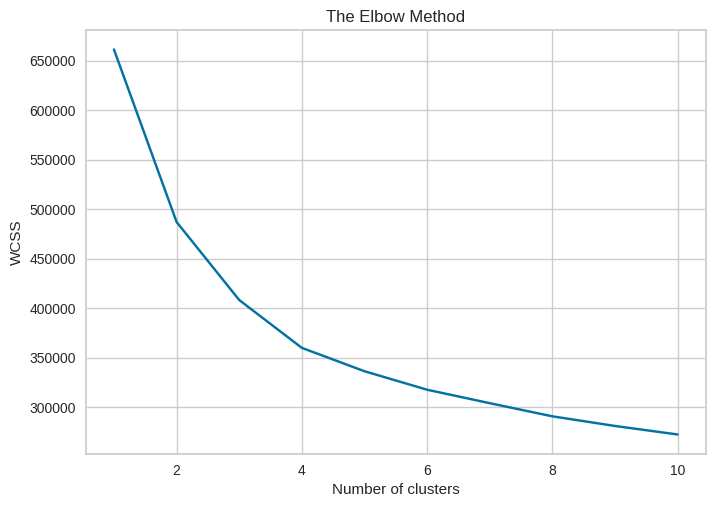

In [5]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)  # Use scaled features
    wcss.append(kmeans.inertia_)

# Plot the results
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [6]:
# Installing the kneed module
!pip install --upgrade kneed

# Importing Kneed to help get the elbow
from kneed import KneeLocator


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

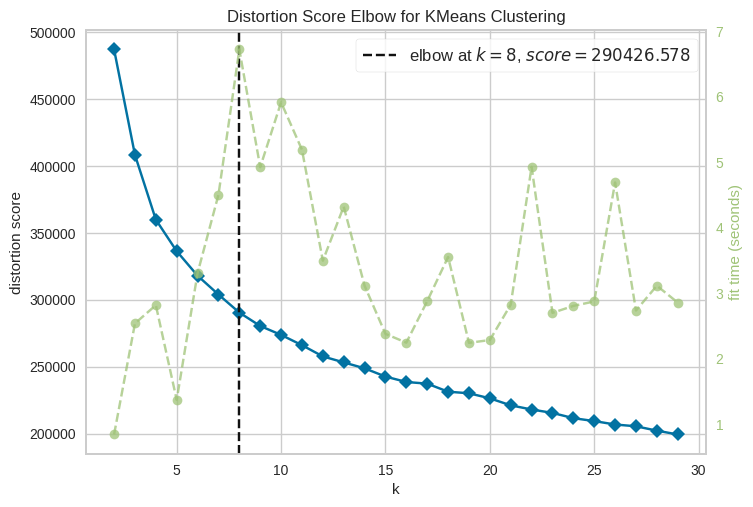

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
# Initialize the KMeans model
model = KMeans()

# Initialize the KElbowVisualizer with the range of clusters
visualizer = KElbowVisualizer(model, k=(2, 30), timings=True)

# Fit the data to the visualizer
visualizer.fit(scaled_features)

# Render the plot
visualizer.show()


In [8]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(features)

# Add the cluster labels to the original data
df['cluster'] = kmeans.labels_

# Inspect the data with cluster labels
print(df.head())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   T1  T2  T3  T4  T5  T6  T7  T8  T9  T10  T11  T12  T13  T14  T15  T16  T17  \
0 -70 -61 -66 -53 -51 -63 -82 -57 -76  -78  -66  -66  -61  -59  -73  -75  -63   
1 -77 -74 -71 -76 -65 -63 -66 -52 -55  -75  -72  -75  -74  -61  -64  -63  -53   
2 -53 -38 -55 -66 -62 -62 -65 -70 -62  -52  -56  -53  -66  -68  -72  -60  -68   
3 -72 -62 -59 -65 -65 -65 -78 -82 -83  -59  -84  -60  -64  -83  -69  -72  -95   
4 -67 -69 -65 -63 -59 -53 -70 -72 -71  -60  -61  -57  -54  -76  -61  -66  -71   

   T18 target  cluster  
0  -77    B37        7  
1  -63    B61        2  
2  -77    A19        4  
3  -73    A22        5  
4  -80    A33        7  


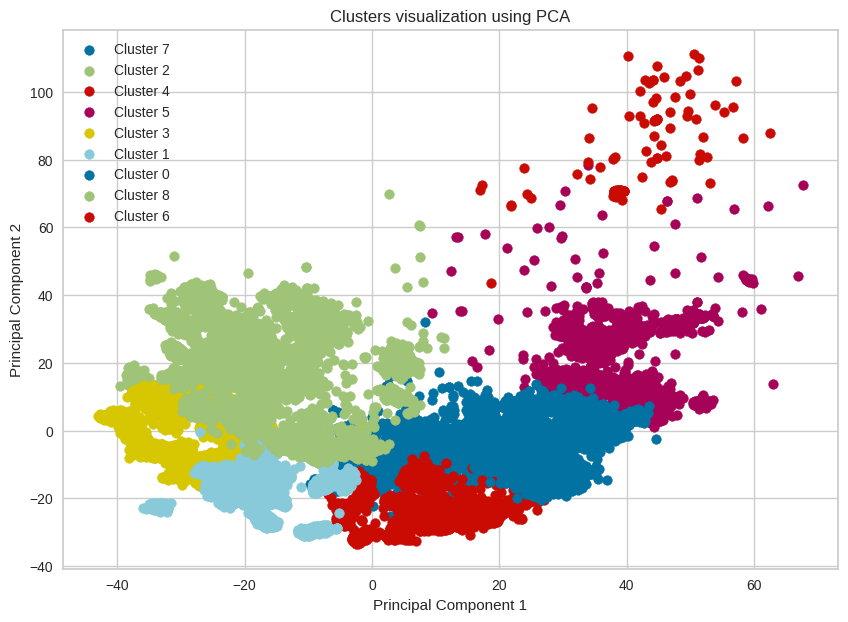

In [9]:
from sklearn.decomposition import PCA

# Use PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)
pca_df = pd.DataFrame(data=principal_components, columns=['principal_component_1', 'principal_component_2'])

# Add the cluster labels to the PCA dataframe
pca_df['cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 7))
for cluster in pca_df['cluster'].unique():
    clustered_data = pca_df[pca_df['cluster'] == cluster]
    plt.scatter(clustered_data['principal_component_1'], clustered_data['principal_component_2'],
                label=f'Cluster {cluster}')

plt.title('Clusters visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Function to find cluster of a new data point
def find_cluster(new_data_point, kmeans_model):
    """
    This function takes a new data point and a trained KMeans model,
    and returns the cluster label for the new data point.

    Parameters:
    new_data_point (array-like): The new data point to classify
    kmeans_model (KMeans object): The trained KMeans model

    Returns:
    int: The cluster label for the new data point
    """
    new_data_point = np.array(new_data_point).reshape(1, -1)
    return kmeans_model.predict(new_data_point)[0]



In [10]:
# Example usage with a new data point
new_data_point = [-56, -65, -67, -77, -68, -64, -73, -77, -75, -56, -54, -56, -67, -72, -65, -67, -74, -72]
cluster_label = find_cluster(new_data_point, kmeans)
print(f"The new data point belongs to cluster: {cluster_label}")

The new data point belongs to cluster: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
